In [39]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')



In [40]:
from google.colab import files
uploaded = files.upload()

Saving USDT-USD.csv to USDT-USD.csv


In [41]:
import io
df = pd.read_csv("USDT-USD.csv", index_col=0, parse_dates=True)
df.shape
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,1.010870,1.013270,0.996515,1.008180,1.008180,358188000
2017-11-10,1.006500,1.024230,0.995486,1.006010,1.006010,756446016
2017-11-11,1.005980,1.026210,0.995799,1.008990,1.008990,746227968
2017-11-12,1.006020,1.105910,0.967601,1.012470,1.012470,1466060032
2017-11-13,1.004480,1.029290,0.975103,1.009350,1.009350,767884032
...,...,...,...,...,...,...
2023-01-01,0.999680,0.999761,0.999567,0.999692,0.999692,11344984018
2023-01-02,0.999688,0.999844,0.999621,0.999771,0.999771,16348780894
2023-01-03,0.999783,0.999896,0.999722,0.999759,0.999759,18233713873


Text(0, 0.5, 'ETH-USD Açılış Fiyatları')

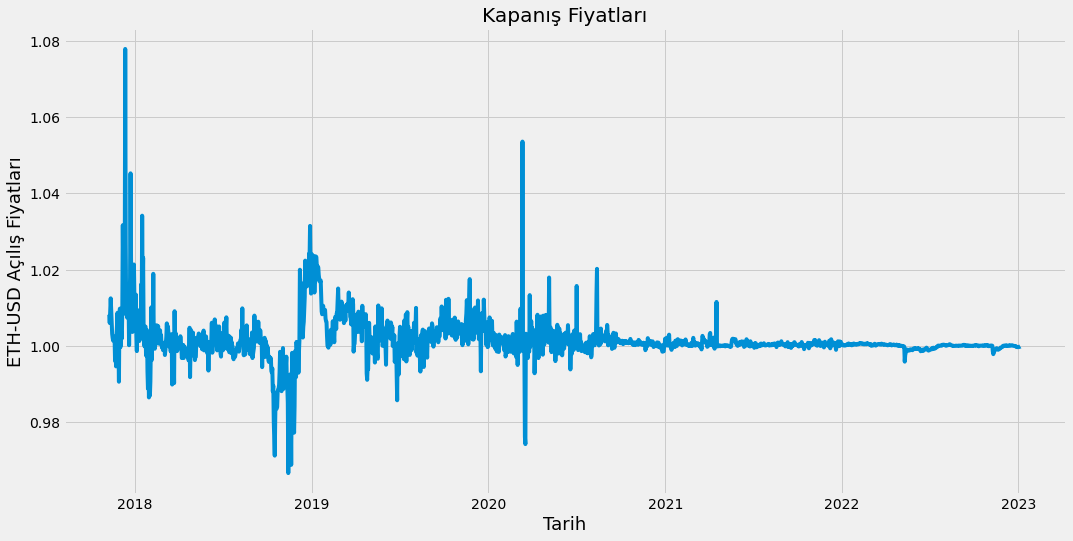

In [42]:
plt.figure(figsize=(16,8))
plt.title("Kapanış Fiyatları")
plt.plot(df['Close'])
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('ETH-USD Açılış Fiyatları', fontsize=18)


In [43]:
data= df.filter(['Close'])
dataset= data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1508

In [44]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.37340429],
       [0.35389622],
       [0.38068611],
       ...,
       [0.29770038],
       [0.29773634],
       [0.29839261]])

In [45]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.37340429, 0.35389622, 0.38068611, 0.41197094, 0.38392247,
       0.36126793, 0.32845482, 0.31892553, 0.3123629 , 0.32063361,
       0.32180229, 0.31712755, 0.26432989, 0.30121543, 0.2516002 ,
       0.32081341, 0.34850228, 0.37789924, 0.31146391, 0.30112553,
       0.21541587, 0.3726851 , 0.38778813, 0.29675645, 0.30580028,
       0.33285987, 0.31757704, 0.38895681, 0.58448704, 0.45808911,
       0.45386386, 0.45943759, 0.46671941, 1.        , 0.54403251,
       0.37349419, 0.44460426, 0.36657197, 0.38293358, 0.41691539,
       0.39587903, 0.30148513, 0.38266389, 0.46123557, 0.70674961,
       0.50690424, 0.39992448, 0.33645582, 0.33276997, 0.35911036,
       0.35056996, 0.49180122, 0.41008307, 0.36531339, 0.34391744,
       0.42069114, 0.32261138, 0.28758675, 0.38068611, 0.31398109])]
[0.38365277428170863]

[array([0.37340429, 0.35389622, 0.38068611, 0.41197094, 0.38392247,
       0.36126793, 0.32845482, 0.31892553, 0.3123629 , 0.32063361,
       0.32180229, 0.31712755, 0.26

In [46]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [47]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1448, 60, 1)


In [48]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [49]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [50]:
model.fit(x_train,y_train, batch_size=1,epochs=5)

Epoch 1/5
1448/1448 [==============================] - 42s 27ms/step - loss: 0.0020
Epoch 2/5
1448/1448 [==============================] - 38s 26ms/step - loss: 0.0016
Epoch 3/5
1448/1448 [==============================] - 37s 26ms/step - loss: 0.0015
Epoch 4/5
1448/1448 [==============================] - 37s 26ms/step - loss: 0.0015
Epoch 5/5
1448/1448 [==============================] - 39s 27ms/step - loss: 0.0015


In [51]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for y in range(60,len(test_data)):
  x_test.append(test_data[y-60:y,0])
  

In [52]:
x_test = np.array(x_test)

In [53]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [54]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 15ms/step


In [55]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.0010667308893406642

<ipython-input-56-87bcbd9c370a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Tahminler'] = predictions


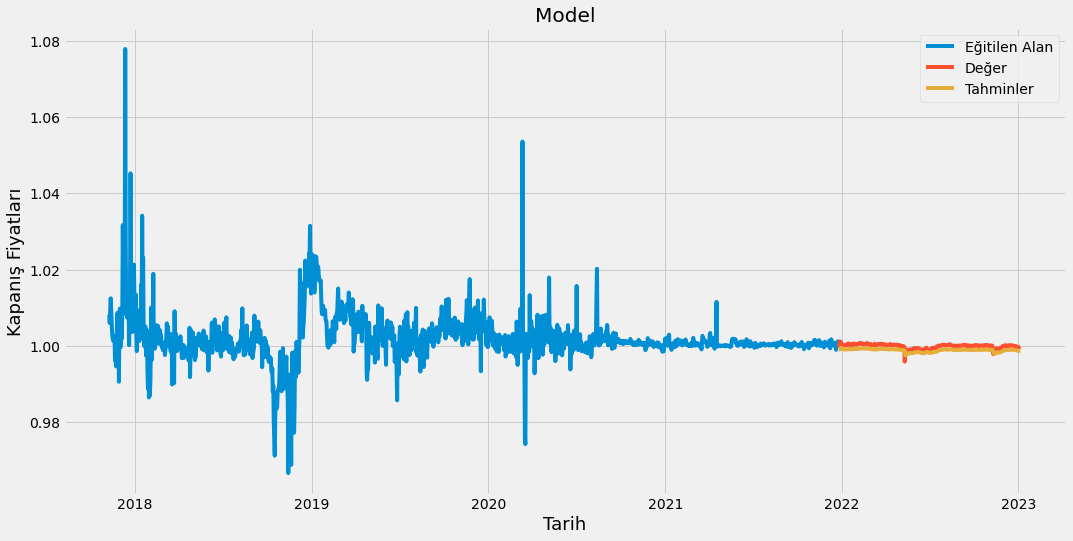

               Close  Tahminler
Date                           
2021-12-26  1.000449   0.999135
2021-12-27  0.999944   0.999178
2021-12-28  1.001168   0.999048
2021-12-29  1.000294   0.999363
2021-12-30  1.001036   0.999248
...              ...        ...
2023-01-01  0.999692   0.998713
2023-01-02  0.999771   0.998707
2023-01-03  0.999759   0.998726
2023-01-04  0.999763   0.998729
2023-01-05  0.999836   0.998732

[376 rows x 2 columns]


In [56]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Tahminler'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Tarih',fontsize=18)
plt.ylabel('Kapanış Fiyatları',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Tahminler']])
plt.legend(['Eğitilen Alan','Değer','Tahminler'])
plt.show()
print(valid)